<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/An%C3%A1lise_Op%C3%A7%C3%A3o_VIIA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [3]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Parâmetros
inicio = '2022-09-20'
fim = '2023-09-20'
ticker = 'VIIA3.SA'
fonte = 'yahoo'
Selic = 12.75


In [7]:
Ativo = yf.download(ticker, start=inicio, end=fim)
Ativo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-20,3.20,3.28,3.15,3.19,3.19,53765300
2022-09-21,3.20,3.47,3.18,3.35,3.35,92327700
2022-09-22,3.45,3.47,3.26,3.36,3.36,58168000
2022-09-23,3.27,3.40,3.25,3.35,3.35,48986000
2022-09-26,3.31,3.40,3.21,3.21,3.21,57887200
...,...,...,...,...,...,...
2023-09-13,1.17,1.17,1.17,1.17,1.17,0
2023-09-14,1.17,1.17,1.17,1.17,1.17,0
2023-09-15,1.17,1.17,1.17,1.17,1.17,0


In [8]:
Ativo_Ajustado = Ativo.drop(Ativo.columns[[0,1,2,3,5]],axis=1)
Ativo_Ajustado.head(2)

,Adj Close
Date,
2022-09-20,3.19
2022-09-21,3.35


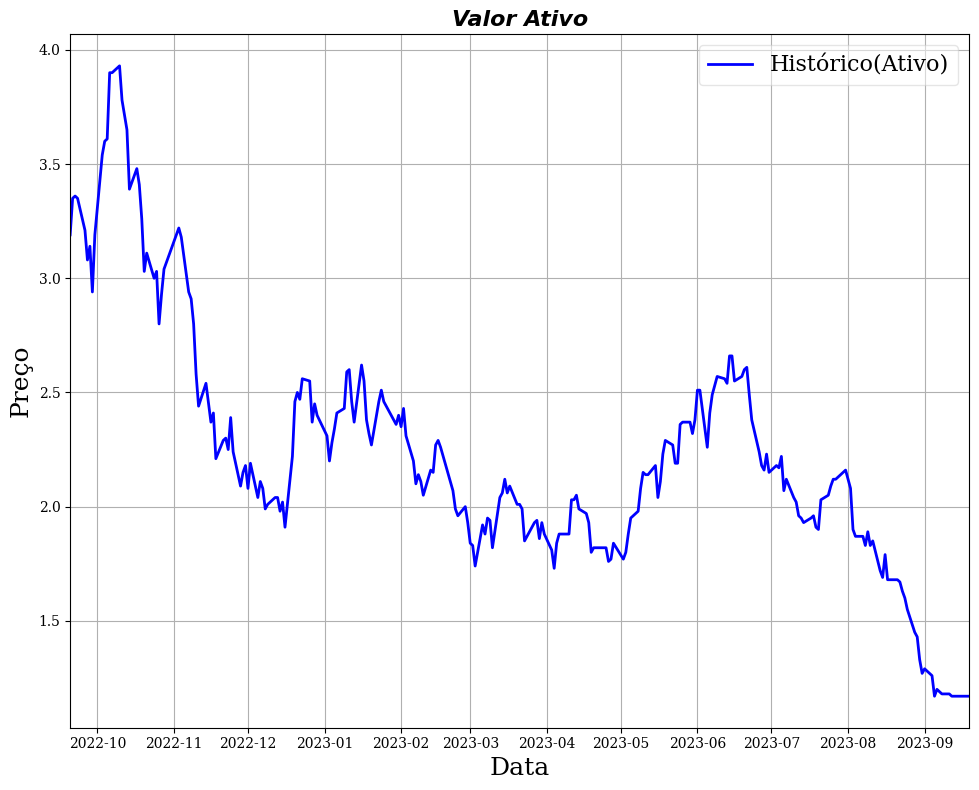

In [9]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,8))
plt.title('Valor Ativo', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Ativo_Ajustado['Adj Close'],label='Histórico(Ativo)', color='blue', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

In [10]:
Ativo_Ajustado.describe()

,Adj Close
count,250.000000
mean,2.236160
std,0.538304
min,1.170000
25%,1.930000
50%,2.150000
75%,2.457500
max,3.930000


#Cálculo da Volatilidade

In [11]:
Vol = Ativo_Ajustado.std()
Vol

Adj Close    0.538304
dtype: float64

<Axes: xlabel='Date'>

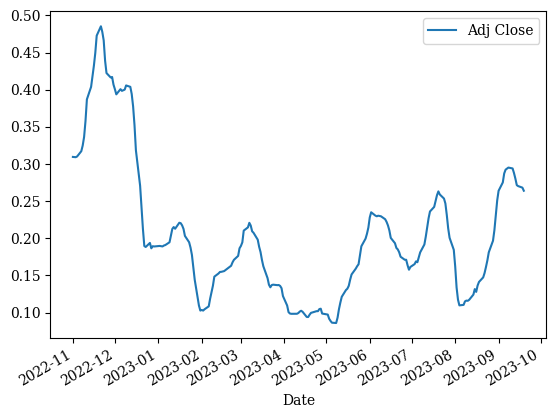

In [12]:
MM_Vol = Ativo_Ajustado.rolling(window=30).std()
MM_Vol.plot()

In [13]:
ultimo_dado = Ativo_Ajustado.iloc[-1]
ultimo_dado

Adj Close    1.17
Name: 2023-09-19 00:00:00, dtype: float64

In [14]:
Máximo = ultimo_dado + 2*Vol
Máximo

Adj Close    2.246607
dtype: float64

In [15]:
Mínimo = ultimo_dado - 2*Vol
Mínimo

Adj Close    0.093393
dtype: float64

<Axes: ylabel='Frequency'>

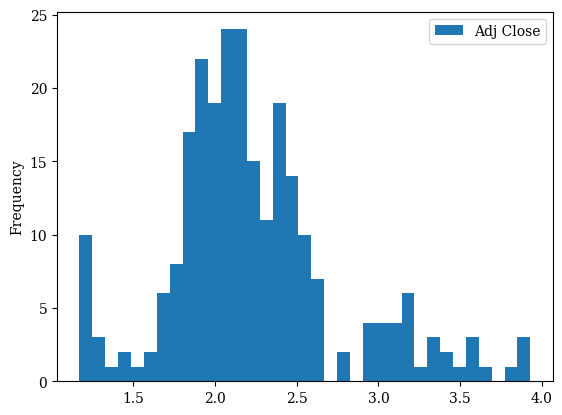

In [16]:
Ativo_Ajustado.plot.hist(bins=35)

In [17]:
div = vbt.YFData.download(ticker,start = inicio).get('Dividends')
div.tail()

Date
2023-09-14 03:00:00+00:00    0.0
2023-09-15 03:00:00+00:00    0.0
2023-09-18 03:00:00+00:00    0.0
2023-09-19 03:00:00+00:00    0.0
2023-09-20 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [18]:
Soma_Div = div.sum()
Soma_Div

0.0

In [19]:
Soma_Div1 = div.rolling('365D').sum()
Soma_Div1.tail()

Date
2023-09-14 03:00:00+00:00    0.0
2023-09-15 03:00:00+00:00    0.0
2023-09-18 03:00:00+00:00    0.0
2023-09-19 03:00:00+00:00    0.0
2023-09-20 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [20]:
DVY = Soma_Div/ultimo_dado
DVY

Adj Close    0.0
Name: 2023-09-19 00:00:00, dtype: float64

In [21]:
Valor_Empresa = Soma_Div/(Selic)
Valor_Empresa

0.0

# Análise dos Prêmios

In [22]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/VIIA3_19_09_23.xlsx")
Opções.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.0,0.47,0.99,-0.0002,0.46,-0.46,0.0,0.0,0.30,0.00,0.02,0.00,0.0,-0.0001,-0.01,0.00,0.00
1,0.0,0.42,0.98,-0.0003,0.41,-0.41,0.0,0.0,0.35,0.00,0.03,0.00,0.0,-0.0001,-0.02,0.00,0.00
2,0.0,0.37,0.97,-0.0005,0.36,-0.36,0.0,0.0,0.40,0.01,0.03,0.00,0.0,-0.0003,-0.03,0.00,0.00
3,0.0,0.33,0.94,-0.0007,0.31,-0.31,0.0,0.0,0.45,0.02,0.03,0.02,0.0,-0.0004,-0.06,0.01,0.02
4,0.0,0.29,0.90,-0.0009,0.26,-0.26,0.0,0.0,0.50,0.02,0.04,0.03,0.0,-0.0006,-0.10,0.02,0.03


In [23]:
Seleção_de_colunas = Opções.iloc[[1,2,3,4,5,6,7,8],[8,12]]
Seleção_de_colunas.head(3)

,Strike,Intrínseco.1
1,0.35,0.0
2,0.40,0.0
3,0.45,0.0


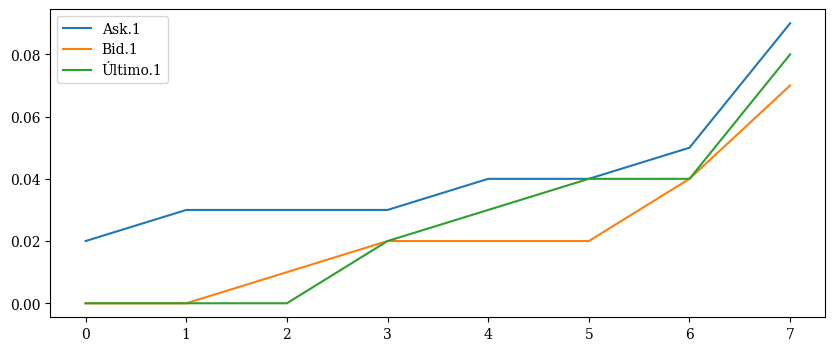

In [52]:
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (10,4));

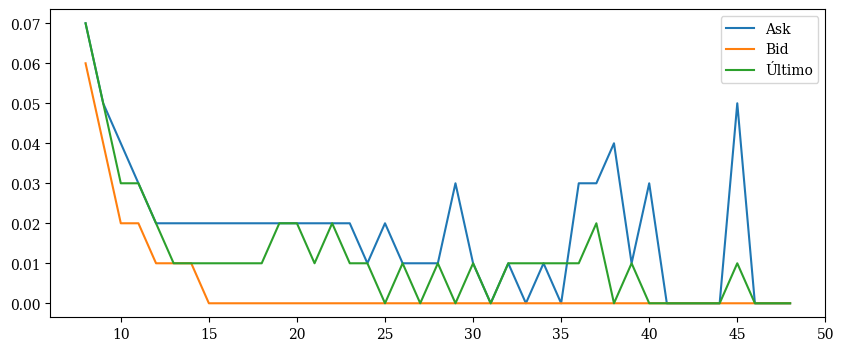

In [53]:
CALLs_OTM = Opções[(Opções['Intrínseco']<=0)]
CALLs_OTM[['Ask','Bid','Último']].plot(figsize = (10,4));

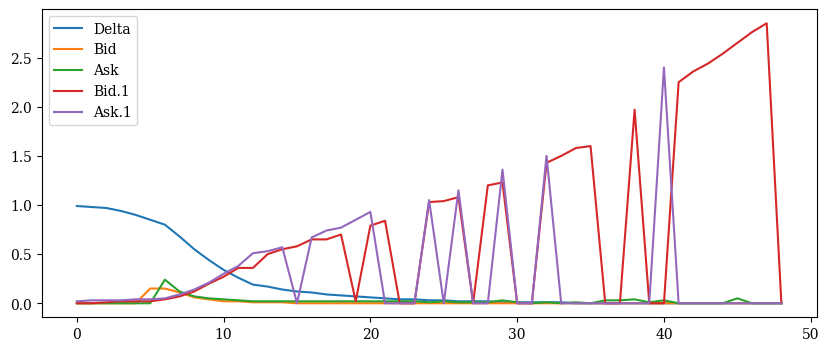

In [26]:
Opções[['Delta', 'Bid','Ask', 'Bid.1','Ask.1']].plot(figsize = (10,4));

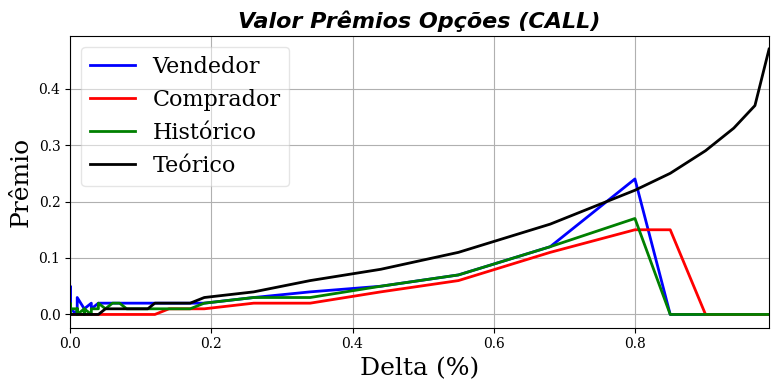

In [27]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(8,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta'],Opções['Ask'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta'],Opções['Bid'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta'],Opções['Último'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta'],Opções['Preço Teórico'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

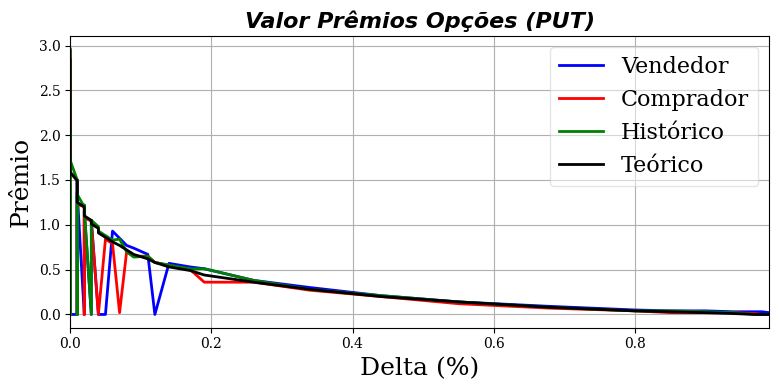

In [28]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(8,4))
plt.title('Valor Prêmios Opções (PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta'],Opções['Ask.1'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta'],Opções['Bid.1'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta'],Opções['Último.1'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta'],Opções['Preço Teórico.1'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

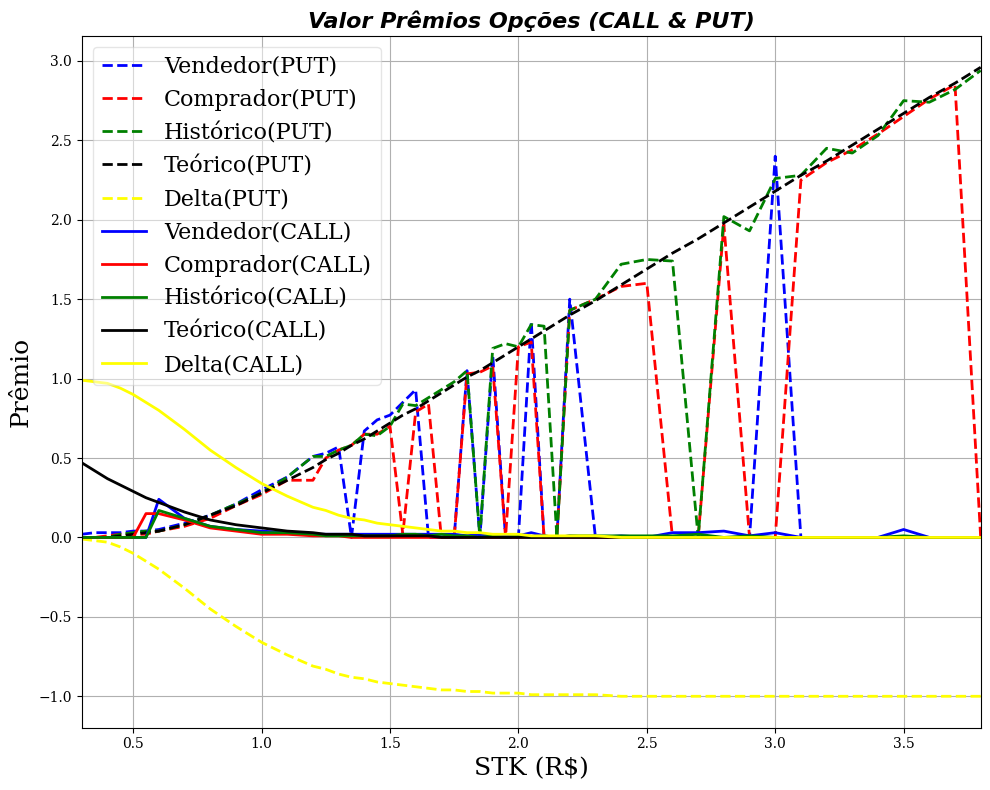

In [29]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,8))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Ask.1'],label='Vendedor(PUT)', color='blue',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid.1'],label='Comprador(PUT)', color='red',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta.1'],label='Delta(PUT)', color='yellow',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Ask'],label='Vendedor(CALL)', color='blue', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid'],label='Comprador(CALL)', color='red', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta'],label='Delta(CALL)', color='yellow', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

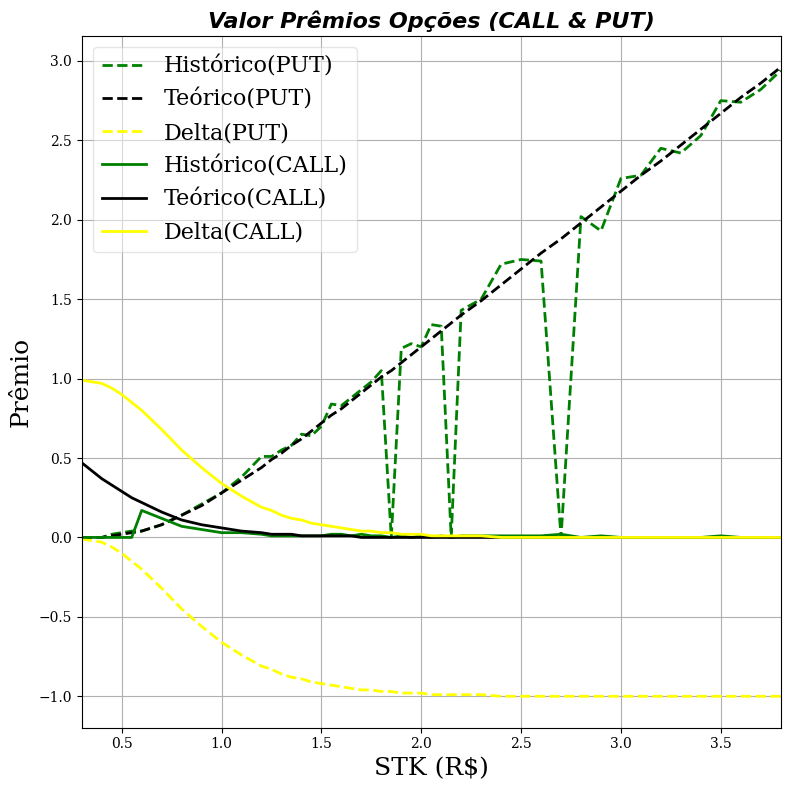

In [30]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(8,8))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta.1'],label='Delta(PUT)', color='yellow',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta'],label='Delta(CALL)', color='yellow', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

#Conclusões:


In [31]:
PUTs_OTM

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,0.47,0.99,-0.0002,0.46,-0.46,0.00,0.00,0.30,0.00,0.02,0.00,0.0,-0.0001,-0.01,0.00,0.00
1,0.00,0.42,0.98,-0.0003,0.41,-0.41,0.00,0.00,0.35,0.00,0.03,0.00,0.0,-0.0001,-0.02,0.00,0.00
2,0.00,0.37,0.97,-0.0005,0.36,-0.36,0.00,0.00,0.40,0.01,0.03,0.00,0.0,-0.0003,-0.03,0.00,0.00
3,0.00,0.33,0.94,-0.0007,0.31,-0.31,0.00,0.00,0.45,0.02,0.03,0.02,0.0,-0.0004,-0.06,0.01,0.02
4,0.00,0.29,0.90,-0.0009,0.26,-0.26,0.00,0.00,0.50,0.02,0.04,0.03,0.0,-0.0006,-0.10,0.02,0.03
5,0.00,0.25,0.85,-0.0011,0.21,-0.21,0.15,0.00,0.55,0.02,0.04,0.04,0.0,-0.0008,-0.15,0.03,0.04
6,0.17,0.22,0.80,-0.0013,0.16,0.01,0.15,0.24,0.60,0.04,0.05,0.04,0.0,-0.0010,-0.20,0.04,0.04
7,0.12,0.16,0.68,-0.0016,0.06,0.06,0.11,0.12,0.70,0.07,0.09,0.08,0.0,-0.0012,-0.32,0.08,0.08


In [32]:
PUTs_OTM.describe()

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.000000
mean,0.036250,0.313750,0.888750,-0.000825,0.278750,-0.242500,0.051250,0.045000,0.481250,0.022500,0.041250,0.026250,0.0,-0.000562,-0.111250,0.022500,0.026250
std,0.068439,0.104326,0.107496,0.000492,0.133463,0.189114,0.071801,0.089283,0.133463,0.023146,0.021671,0.027742,0.0,0.000410,0.107496,0.027646,0.027742
min,0.000000,0.160000,0.680000,-0.001600,0.060000,-0.460000,0.000000,0.000000,0.300000,0.000000,0.020000,0.000000,0.0,-0.001200,-0.320000,0.000000,0.000000
25%,0.000000,0.242500,0.837500,-0.001150,0.197500,-0.372500,0.000000,0.000000,0.387500,0.007500,0.030000,0.000000,0.0,-0.000850,-0.162500,0.000000,0.000000
50%,0.000000,0.310000,0.920000,-0.000800,0.285000,-0.285000,0.000000,0.000000,0.475000,0.020000,0.035000,0.025000,0.0,-0.000500,-0.080000,0.015000,0.025000
75%,0.030000,0.382500,0.972500,-0.000450,0.372500,-0.155000,0.120000,0.030000,0.562500,0.025000,0.042500,0.040000,0.0,-0.000250,-0.027500,0.032500,0.040000
max,0.170000,0.470000,0.990000,-0.000200,0.460000,0.060000,0.150000,0.240000,0.700000,0.070000,0.090000,0.080000,0.0,-0.000100,-0.010000,0.080000,0.080000


In [87]:
P_max = PUTs_OTM.iat[-1,10]
P_max

0.09

In [89]:
Linha_P_max = PUTs_OTM[(PUTs_OTM['Ask.1'] >= P_max)]
Strike_Pmax = Linha_P_max.iat[0,8]
Strike_Pmax

0.7

In [91]:
Prêmio_perc = P_max/Strike_Pmax
Prêmio_perc

0.1285714285714286

In [97]:
Delta_min = PUTs_OTM['Delta.1'].max()
Index_min = PUTs_OTM['Delta.1'].idxmax()
Delta_min

-0.01

In [98]:
Index_min

0

In [101]:
Strike_Deltamin = PUTs_OTM.iat[0,8]
Strike_Deltamin

0.3